### Name: Amirhossein Ahmadinoori
### Student ID: 169042860

My dataset contains yearly prices of three types of hotel rates in Ontario. It is downloaded from https://data.ontario.ca/dataset/regional-tourism-profiles. 

Question: How did hotel prices changed in the period of 2008 to 2022 in ontario ?


First, we import our data set from .xclsx downloaded files to a dataset called main_df

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
regions=["SW Ontario","SW Ontario","Hamilton","Waterloo","GTA","York","Lake Simcoe","Kawarthas","SE Ontario","Ottawa","Haliburton","Muskoka","N Ontario","NE Ontario","Sault Ste. Marie","NW Ontario"]
files=["1","2","3","4","5","6","7","8","9","10","11","12","13","13a","13b","13c"]
indices_to_keep=[4,5,6,7,8]
io="mtcs-tourism-regional-profile-region13c-en-2022-12-01.xlsx"
main_df=pd.DataFrame(columns=['Year','Occupancy Rate','Average Daily Rate','Revenue per Available Room','Location'])
for i in range(16):
    
    df = pd.read_excel("mtcs-tourism-regional-profile-region"+files[i]+"-en-2022-12-01.xlsx", sheet_name="Hotel Statistics")
    filtered_df = df.iloc[indices_to_keep]
    filtered_df.loc[8]=regions[i]
    transposed_df = filtered_df.T
    transposed_df.columns=['Year','Occupancy Rate','Average Daily Rate','Revenue per Available Room','Location']
    transposed_df = transposed_df[pd.to_numeric(transposed_df['Occupancy Rate'], errors='coerce').notnull()]
    transposed_df = transposed_df.reset_index(drop=True)
    main_df = pd.concat([main_df, transposed_df], ignore_index=True)


main_df



,Year,Occupancy Rate,Average Daily Rate,Revenue per Available Room,Location
0,2008,0.5058,100.62,50.896059,SW Ontario
1,2009.0,0.4533,98.3,44.559002,SW Ontario
2,2010.0,0.4921,96.31,47.394151,SW Ontario
3,2011.0,0.496,96.02,47.62592,SW Ontario
4,2012.0,0.489,95.69,46.79241,SW Ontario
...,...,...,...,...,...
235,2018.0,0.707463,123.321902,87.245674,NW Ontario
236,2019.0,0.695019,129.857443,90.253454,NW Ontario
237,2020.0,0.528803,123.679188,65.401961,NW Ontario
238,2021.0,0.609958,132.820216,81.014788,NW Ontario


Then, we change Year column data type integer and then to date/time object.

In [14]:
import plotly.graph_objects as go
df = main_df

df["Year"]=df["Year"].astype('int64')


main_df['Year'] = pd.to_datetime(main_df['Year'], format='%Y')


main_df["Year"]=main_df['Year'].dt.year


main_df

,Year,Occupancy Rate,Average Daily Rate,Revenue per Available Room,Location
0,2008,0.5058,100.62,50.896059,SW Ontario
1,2009,0.4533,98.3,44.559002,SW Ontario
2,2010,0.4921,96.31,47.394151,SW Ontario
3,2011,0.496,96.02,47.62592,SW Ontario
4,2012,0.489,95.69,46.79241,SW Ontario
...,...,...,...,...,...
235,2018,0.707463,123.321902,87.245674,NW Ontario
236,2019,0.695019,129.857443,90.253454,NW Ontario
237,2020,0.528803,123.679188,65.401961,NW Ontario
238,2021,0.609958,132.820216,81.014788,NW Ontario


Creating a dictionary of data frames based on location. Plotting occupancy rate, daily rate and revenue of each location separately to show the trend.
We can see that there is a fall in 2020 because of covid pandemic.

In [15]:


dfs = dict(tuple(main_df.groupby('Location')))



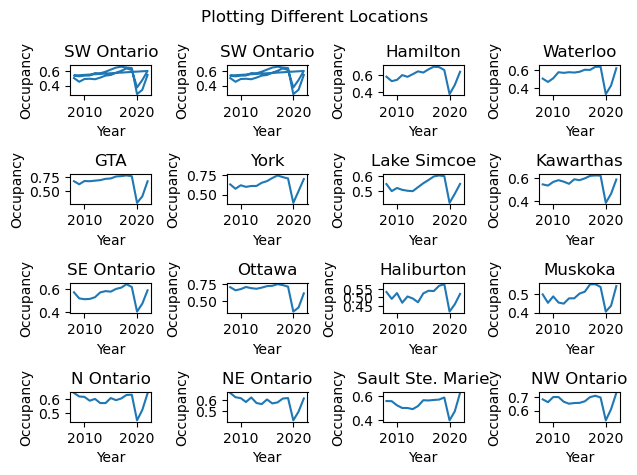

In [16]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(4, 4)  # Creating a 4x4 grid of subplots

for i, region in enumerate(regions[:16]):  # Looping over the first 16 regions
    row = i // 4  # Calculating row index
    col = i % 4   # Calculating column index
    
    ax = axs[row, col]  # Getting the current subplot
    
    ax.plot(dfs[region]["Year"], dfs[region]["Occupancy Rate"])
    ax.set_title(region)  # Setting title for the subplot
    ax.set_xlabel("Year")
    ax.set_ylabel("Occupancy")
    
plt.suptitle("Plotting Different Locations")
plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()


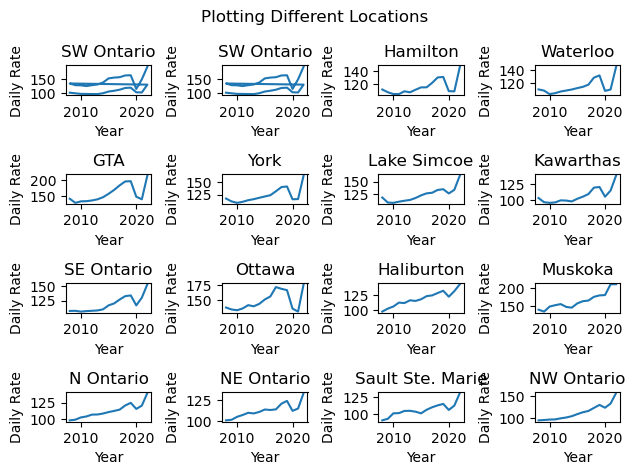

In [17]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(4, 4)  # Creating a 4x4 grid of subplots

for i, region in enumerate(regions[:16]):  # Looping over the first 16 regions
    row = i // 4  # Calculating row index
    col = i % 4   # Calculating column index
    
    ax = axs[row, col]  # Getting the current subplot
    
    ax.plot(dfs[region]["Year"], dfs[region]["Average Daily Rate"])
    ax.set_title(region)  # Setting title for the subplot
    ax.set_xlabel("Year")
    ax.set_ylabel("Daily Rate")
    
plt.suptitle("Plotting Different Locations")
plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()


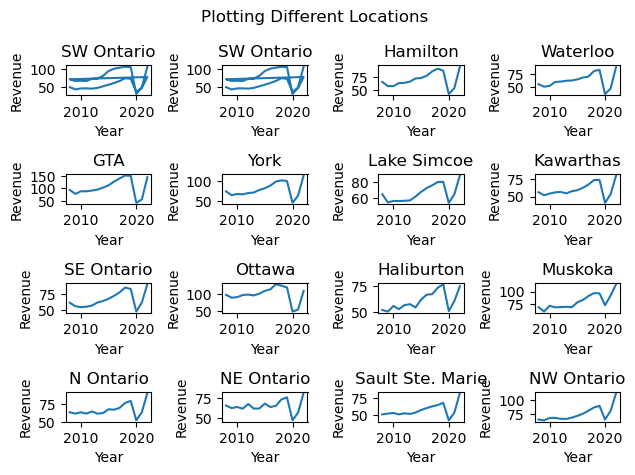

In [18]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(4, 4)  # Creating a 4x4 grid of subplots

for i, region in enumerate(regions[:16]):  # Looping over the first 16 regions
    row = i // 4  # Calculating row index
    col = i % 4   # Calculating column index
    
    ax = axs[row, col]  # Getting the current subplot
    
    ax.plot(dfs[region]["Year"], dfs[region]["Revenue per Available Room"])
    ax.set_title(region)  # Setting title for the subplot
    ax.set_xlabel("Year")
    ax.set_ylabel("Revenue")
    
plt.suptitle("Plotting Different Locations")
plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()


Splitting main_df data frame based on Year column to create a dictionary of data frames based on year for different locations.

In [19]:
import datetime
dfss = dict(tuple(main_df.groupby('Year')))
print(dfss.keys())
timestamp_specific = datetime.datetime(2022, 1, 1, 0, 0, 0)
dfss[2022]

dict_keys([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


,Year,Occupancy Rate,Average Daily Rate,Revenue per Available Room,Location
14,2022,0.606244,129.71114,78.636602,SW Ontario
29,2022,0.54964,194.475794,106.891598,SW Ontario
44,2022,0.64321,147.279732,94.731837,Hamilton
59,2022,0.622506,145.660213,90.674289,Waterloo
74,2022,0.669893,215.072307,144.075398,GTA
89,2022,0.700442,161.936678,113.427322,York
104,2022,0.546957,161.947077,88.578013,Lake Simcoe
119,2022,0.587609,137.638169,80.877411,Kawarthas
134,2022,0.586441,152.760737,89.585142,SE Ontario
149,2022,0.615614,176.09799,108.408419,Ottawa


Reducing each data frame to it's mean for the three variables of Occupancy rate, daily rate and daily rate.

In [20]:
dfss[2020]
# f.drop(columns=['B'], inplace=True)
# df_mean = df.groupby('A').mean().reset_index()

for key in (dfss.keys()):
    dfss[key].drop(columns=['Location'], inplace=True)
    dfss[key]=dfss[key].groupby('Year').mean().reset_index()

In [21]:
mean_by_year=pd.DataFrame(columns=dfss[2022].columns)
for key in dfss.keys():
    mean_by_year=pd.concat([mean_by_year, dfss[key]], axis=0)

In [22]:
mean_by_year["Occupancy Rate"]=mean_by_year["Occupancy Rate"]*100
mean_by_year

,Year,Occupancy Rate,Average Daily Rate,Revenue per Available Room
0,2008,58.634375,112.63125,66.144013
0,2009,54.98,109.611875,60.282639
0,2010,57.034375,110.898125,63.339393
0,2011,56.85,112.301875,63.844575
0,2012,57.15,114.791875,65.694649
0,2013,57.11625,115.1475,65.978118
0,2014,58.578125,117.375625,69.054978
0,2015,60.441875,122.74,74.579375
0,2016,61.975,126.4875,78.886875
0,2017,63.732639,131.335037,84.481869


Plotting three average time series.

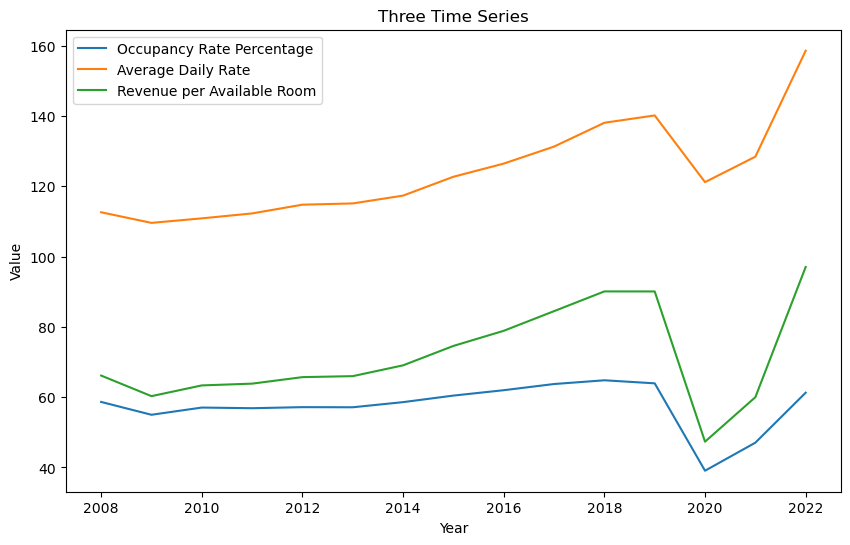

In [23]:
import pandas as pd
import matplotlib.pyplot as plt






# Set the 'Year' column as the index (assuming it's not already)
mean_by_year.set_index('Year', inplace=True)

# Plot the three time series
plt.figure(figsize=(10, 6))

# Plot Series1
plt.plot(mean_by_year.index, mean_by_year['Occupancy Rate'], label='Occupancy Rate Percentage')

# Plot Series2
plt.plot(mean_by_year.index, mean_by_year['Average Daily Rate'], label='Average Daily Rate')

# Plot Series3
plt.plot(mean_by_year.index, mean_by_year['Revenue per Available Room'], label='Revenue per Available Room')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Three Time Series')

# Add legend
plt.legend()

# Show plot
plt.show()


We can see that there is a decline in hotel rates during 2020 to 2022 